In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import	KMeans
from sklearn.decomposition import PCA

In [3]:
hd = pd.read_csv("heart disease.csv")

print(hd.describe())       #shows the summary

hd.info()                 #shows the info and missing values

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
#now we'll drop the unnecessary colum
hd1 = hd.drop(["sex" , "fbs" , "restecg" , "exang" , "thal" , "target"] , axis = 1)

#now we'll normalize the data to a range 0-1.
def norm_func(i):
    x = (i - i.max())/ (i.max()-i.min())
    return(x)
norm_hda = norm_func(hd1)
norm_hda.describe()

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.471535,-0.677668,-0.645059,-0.725425,-0.399642,-0.832322,-0.300330,-0.817657
std,0.189210,0.344017,0.165454,0.118335,0.174849,0.187270,0.308113,0.255652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.614583,-1.000000,-0.754717,-0.805936,-0.522901,-1.000000,-0.500000,-1.000000
50%,-0.458333,-0.666667,-0.660377,-0.739726,-0.374046,-0.870968,-0.500000,-1.000000
75%,-0.333333,-0.333333,-0.566038,-0.660959,-0.274809,-0.741935,0.000000,-0.750000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


                                         clustering(h-clust , kmeans)

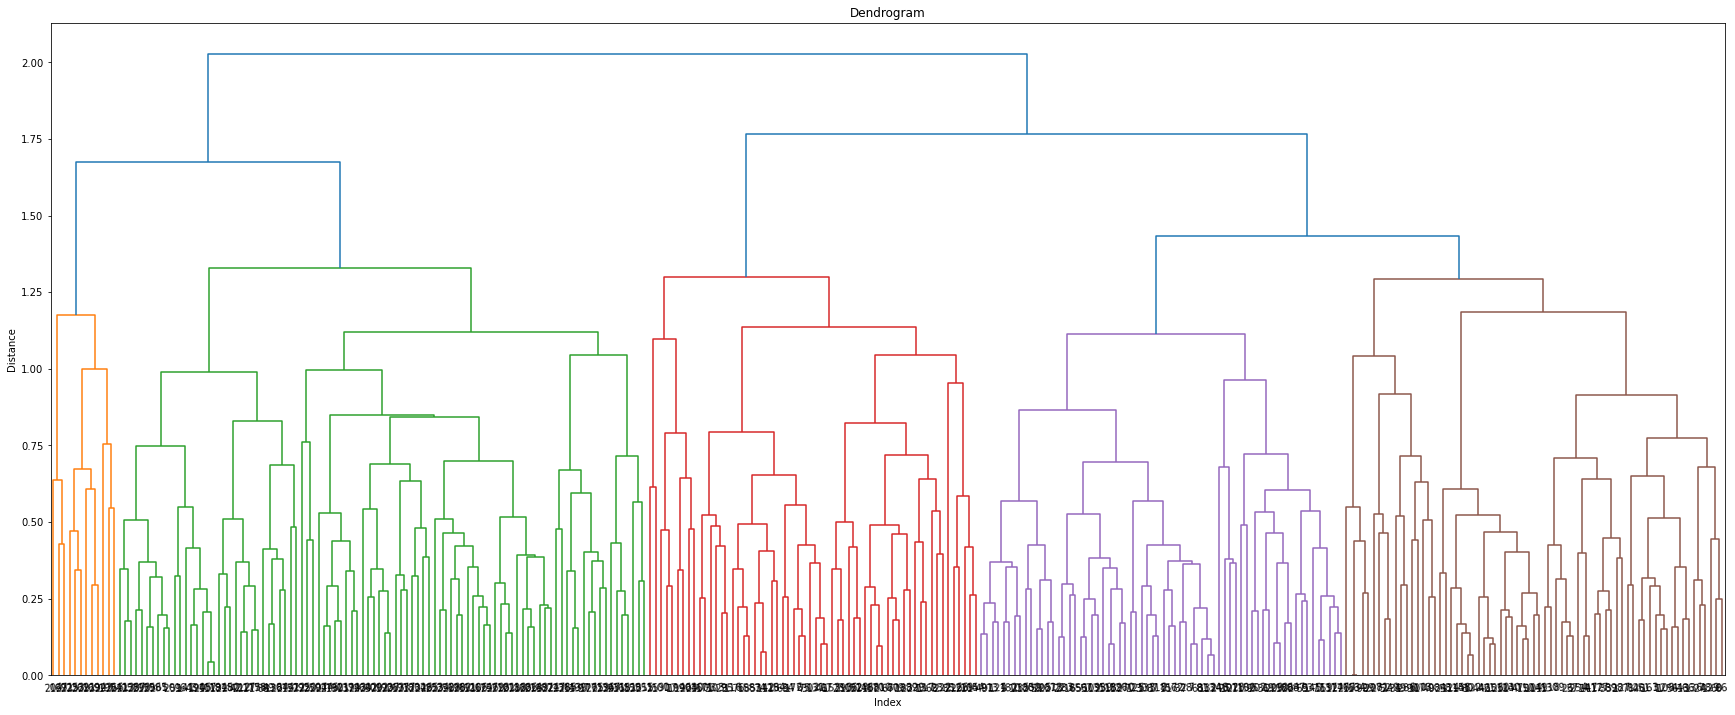

In [6]:
                                                   
z = linkage(norm_hda, method = "complete", metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [7]:
hd_comp = AgglomerativeClustering(n_clusters = 3 , linkage = "complete" ,affinity = "euclidean" ).fit(norm_hda)
hd_cluster_column = pd.Series(hd_comp.labels_)

#now assign this matrix to to data set as a new column.

hd1['grouping']=hd_cluster_column

#now take the grouping column to the 1st.

hd_h = hd1.iloc[ : ,[8,0,1,2,3,4,6,7] ]


In [9]:
                                                  
###### scree plot or elbow curve ############
TWSS = []
k = list(range(1,10))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_hda)
    TWSS.append(kmeans.inertia_)
    
TWSS

[127.2810500006666,
 93.73423134895916,
 75.93747573565588,
 65.2104546323816,
 57.83411486532071,
 54.217469022214885,
 50.7418488324779,
 47.38194326481669,
 45.52843357240588]

Text(0, 0.5, 'total_within_SS')

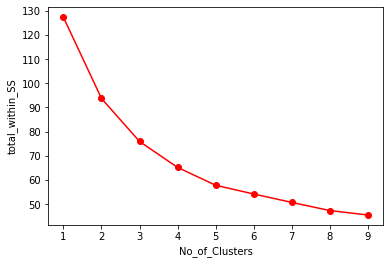

In [10]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [11]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(norm_hda)


KMeans(n_clusters=3)

In [13]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object  
hd1['category'] = mb # creating a  new column and assigning it to new column 
hd_k = hd1.iloc[:,[9,0,1,2,3,4,5,6,7]]


                                                 PCA

In [19]:
                                                          
hdc = pd.read_csv("heart disease.csv")
hdp = hdc.drop(["sex" , "fbs" , "restecg" , "exang" , "thal" , "target"] , axis = 1)

norm_hdp = norm_func(hdp)
print(norm_hdp.describe())
pca = PCA(n_components = 8)
pca_values = pca.fit_transform(norm_hdp)

              age          cp    trestbps        chol     thalach     oldpeak  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    -0.471535   -0.677668   -0.645059   -0.725425   -0.399642   -0.832322   
std      0.189210    0.344017    0.165454    0.118335    0.174849    0.187270   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -0.614583   -1.000000   -0.754717   -0.805936   -0.522901   -1.000000   
50%     -0.458333   -0.666667   -0.660377   -0.739726   -0.374046   -0.870968   
75%     -0.333333   -0.333333   -0.566038   -0.660959   -0.274809   -0.741935   
max      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

            slope          ca  
count  303.000000  303.000000  
mean    -0.300330   -0.817657  
std      0.308113    0.255652  
min     -1.000000   -1.000000  
25%     -0.500000   -1.000000  
50%     -0.500000   -1.000000  
75%      0.000000   -0.750000  
max      0.000

In [20]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var


array([0.34796301, 0.23852759, 0.15629541, 0.08525516, 0.06091269,
       0.0444625 , 0.03819494, 0.0283887 ])

In [21]:
print(pca.components_)

# Cumulative variance 

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

[[ 0.16371556 -0.68024012  0.05173543  0.03085762 -0.26840412  0.28376256
  -0.52869166  0.27343192]
 [ 0.10985183  0.67940467  0.11536815 -0.01101102 -0.08517823  0.26782046
  -0.65804589 -0.03005489]
 [ 0.32969031  0.23490996  0.14687423  0.05782384 -0.06815524  0.02634876
   0.30331074  0.84490779]
 [-0.70057743  0.02755425 -0.40654103 -0.15800662  0.28707455  0.03546773
  -0.20000178  0.44104406]
 [-0.22401196 -0.10820351  0.75422552  0.11016823  0.54766204  0.23867207
   0.0069255   0.01309346]
 [-0.18324299  0.05470437 -0.08652476 -0.10531276 -0.28902917  0.83278503
   0.39395628 -0.11216868]
 [ 0.38702009 -0.03486512 -0.46630736  0.4612717   0.57339894  0.29548707
  -0.01252291 -0.05029876]
 [-0.35788469  0.06184336  0.05814435  0.85709829 -0.34840932 -0.08939199
   0.00750244  0.02567943]]


array([ 34.8 ,  58.65,  74.28,  82.81,  88.9 ,  93.35,  97.17, 100.01])

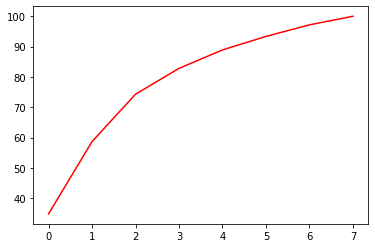

In [22]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [23]:
#PCA scores
print(pca_values)
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5" , "comp6" ,"comp7" 

pca_data

[[-0.04892186  1.01517211 -0.12583319 ... -0.0902863   0.05272176
  -0.07012448]
 [ 0.0621352   0.740226   -0.41540874 ...  0.07844212  0.15774113
   0.01244631]
 [-0.29478738 -0.21493753 -0.17012049 ...  0.2009762  -0.02509316
  -0.05033219]
 ...
 [ 0.58622093  0.05644562  0.25039974 ...  0.15485834  0.07179579
  -0.22340226]
 [ 0.42172495 -0.05302117 -0.05978739 ...  0.01308899 -0.22668264
  -0.17594106]
 [ 0.02656953  0.08060849 -0.00341783 ... -0.28528008  0.07333181
  -0.08947333]]


,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7
0,-0.048922,1.015172,-0.125833,-0.086358,0.020984,-0.090286,0.052722,-0.070124
1,0.062135,0.740226,-0.415409,0.423281,0.276816,0.078442,0.157741,0.012446
2,-0.294787,-0.214938,-0.170120,0.127422,0.146021,0.200976,-0.025093,-0.050332
3,-0.286007,-0.222116,-0.082395,-0.054983,0.014899,0.050351,0.171209,-0.112344
4,-0.025956,-0.448149,-0.131298,-0.155346,0.005572,0.006158,0.239975,0.133271
...,...,...,...,...,...,...,...,...
298,0.303838,-0.085788,-0.251048,-0.181232,-0.066630,-0.145451,-0.154897,0.031519
299,-0.403025,0.570269,-0.137525,0.153672,-0.250384,0.088486,-0.043269,0.173030
300,0.586221,0.056446,0.250400,-0.061533,0.103406,0.154858,0.071796,-0.223402
301,0.421725,-0.053021,-0.059787,-0.004746,-0.157127,0.013089,-0.226683,-0.175941


In [24]:
heart = pd.concat([hd.target, pca_data.iloc[:, 0:3]], axis = 1)
heart

,target,comp0,comp1,comp2
0,1,-0.048922,1.015172,-0.125833
1,1,0.062135,0.740226,-0.415409
2,1,-0.294787,-0.214938,-0.170120
3,1,-0.286007,-0.222116,-0.082395
4,1,-0.025956,-0.448149,-0.131298
...,...,...,...,...
298,0,0.303838,-0.085788,-0.251048
299,0,-0.403025,0.570269,-0.137525
300,0,0.586221,0.056446,0.250400
301,0,0.421725,-0.053021,-0.059787


                                      Clustering after PCA

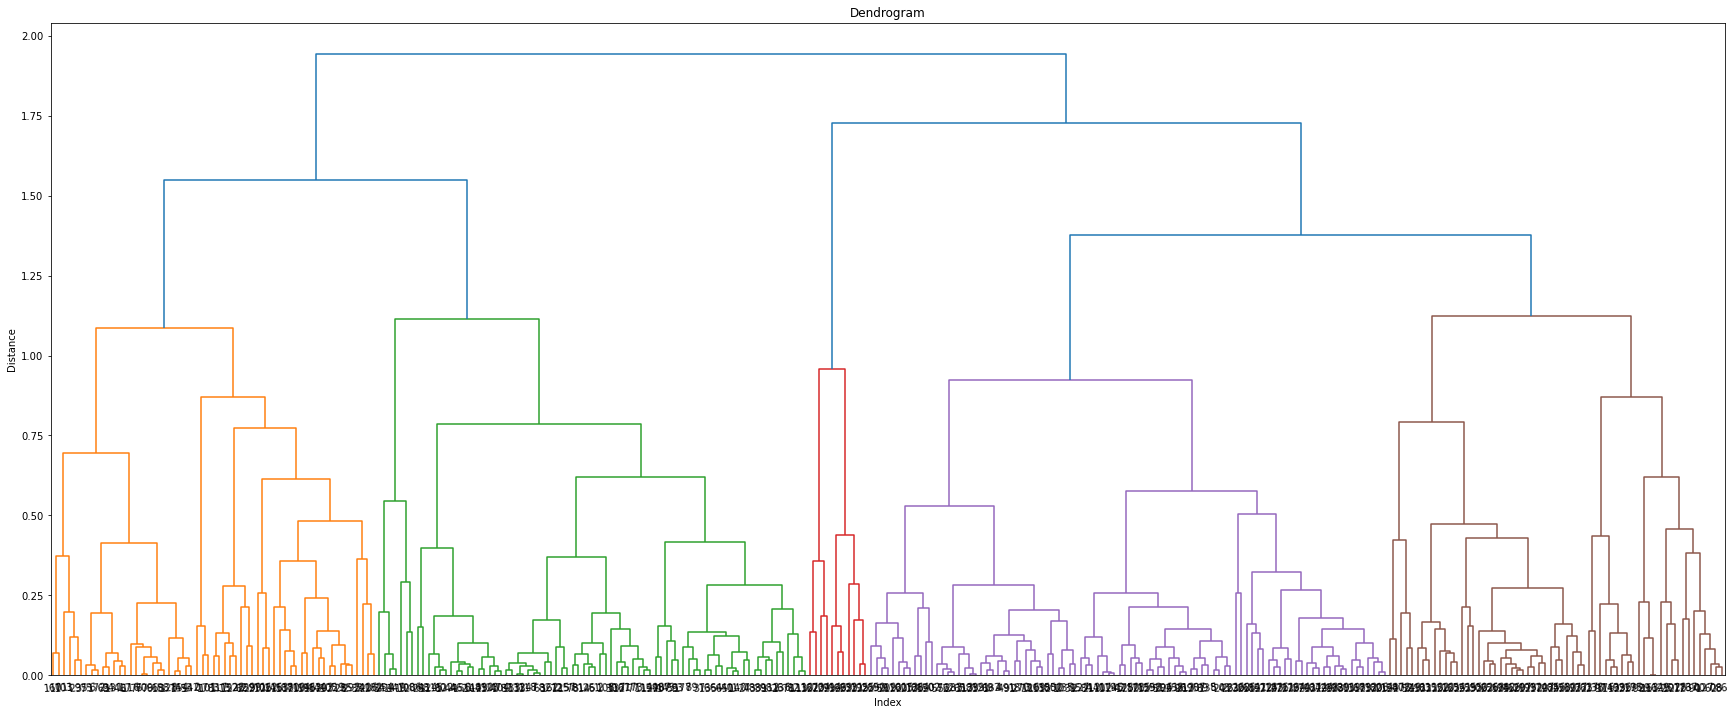

In [25]:
#Now we'll do h_clust on this data.
pbc =pca_data.iloc[:, 0:3]
z = linkage(pbc, method = "complete", metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [27]:
hd_comp1 = AgglomerativeClustering(n_clusters = 3 , linkage = "complete" ,affinity = "euclidean" ).fit(pbc)
hd_cluster_column1 = pd.Series(hd_comp1.labels_)

#now assign this matrix to to data set as a new column.

hdp['grouping']=hd_cluster_column1

#now take the grouping column to the 1st.

hd_hp = hdp.iloc[ : ,[8,0,1,2,3,4,6,7] ]


In [28]:
#Now we'll do kmeans on this.

###### scree plot or elbow curve ############
TWSS1 = []
k = list(range(1,10))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pbc)
    TWSS1.append(kmeans.inertia_)
    
TWSS1

[94.54258297432307,
 61.011447001738915,
 43.47931901814841,
 33.266886005746336,
 26.091280911419705,
 22.65650355617142,
 19.86636211502702,
 17.352445873541644,
 15.689682139802127]

Text(0, 0.5, 'total_within_SS')

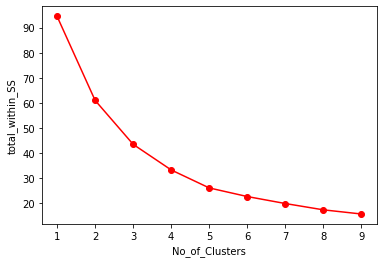

In [29]:
# Scree plot 
plt.plot(k, TWSS1, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [30]:

# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(pbc)

KMeans(n_clusters=3)

In [33]:
mb1 = pd.Series(model.labels_)  # converting numpy array into pandas series object  
hdp['category'] = mb1 # creating a  new column and assigning it to new column 
hd_kp = hdp.iloc[:,[9,0,1,2,3,4,5,6,7]]

              H_clust comparision
             

In [34]:
print(hd_h)
print(hd_hp)

     grouping  age  cp  trestbps  chol  thalach  slope  ca
0           2   63   3       145   233      150      0   0
1           2   37   2       130   250      187      0   0
2           1   41   1       130   204      172      2   0
3           1   56   1       120   236      178      2   0
4           1   57   0       120   354      163      2   0
..        ...  ...  ..       ...   ...      ...    ...  ..
298         0   57   0       140   241      123      1   0
299         2   45   3       110   264      132      1   0
300         0   68   0       144   193      141      1   2
301         0   57   0       130   131      115      1   1
302         2   57   1       130   236      174      1   1

[303 rows x 8 columns]
     grouping  age  cp  trestbps  chol  thalach  slope  ca
0           0   63   3       145   233      150      0   0
1           0   37   2       130   250      187      0   0
2           0   41   1       130   204      172      2   0
3           0   56   1       120

                                KMeans  clust comparision

In [35]:
print(hd_k)
print(hd_kp)

     category  age  cp  trestbps  chol  thalach  oldpeak  slope  ca
0           2   63   3       145   233      150      2.3      0   0
1           2   37   2       130   250      187      3.5      0   0
2           0   41   1       130   204      172      1.4      2   0
3           0   56   1       120   236      178      0.8      2   0
4           0   57   0       120   354      163      0.6      2   0
..        ...  ...  ..       ...   ...      ...      ...    ...  ..
298         1   57   0       140   241      123      0.2      1   0
299         2   45   3       110   264      132      1.2      1   0
300         1   68   0       144   193      141      3.4      1   2
301         1   57   0       130   131      115      1.2      1   1
302         2   57   1       130   236      174      0.0      1   1

[303 rows x 9 columns]
     category  age  cp  trestbps  chol  thalach  oldpeak  slope  ca
0           1   63   3       145   233      150      2.3      0   0
1           1   37   2  